# Co2 Emission By Vehicles

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
file_path = "CO2 Emissions_Canada.csv"
df = pd.read_csv(file_path)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
print(df.head())
print(df.info())
print(df.duplicated().sum())
df = df.drop_duplicates()

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [8]:
df.shape

(6282, 12)

In [9]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df= df.drop_duplicates()
df.shape

(6282, 12)

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     6282.000000  6282.000000                       6282.000000   
mean         3.161812     5.618911                         12.610220   
std          1.365201     1.846250                          3.553066   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.700000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      6282.000000                       6282.000000   
mean                          9.070583                         11.017876   
std                           2.278884                          2.946876   
min                           4.000000         

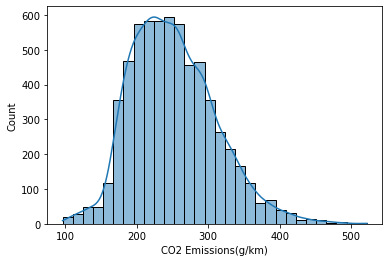

In [11]:
print(df.describe()) 
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True)
plt.show()

In [48]:
import plotly.express as px

fig = px.scatter(df, x='Engine Size(L)', y='CO2 Emissions(g/km)', title='Scatter Plot')
fig.show()


In [13]:
import plotly.express as px

fig = px.scatter(df, x='Engine Size(L)', y='CO2 Emissions(g/km)', title='Scatter Plot')
fig.show()


In [14]:
# Pairplot for numerical variables

fig = px.scatter_matrix(df, dimensions=['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'])
fig.update_traces(diagonal_visible=False)  # Hide self-plots on the diagonal
fig.show()

In [15]:
import plotly.express as px

fig = px.box(df, x='Vehicle Class', y='CO2 Emissions(g/km)', 
             title="Box Plot of CO2 Emissions by Vehicle Class",
             labels={'CO2 Emissions(g/km)': 'CO2 Emissions (g/km)'},  # Rename the y-axis label
             color='Vehicle Class',  # Color by Vehicle Class
             boxmode='overlay',  # Display boxes overlaid for better comparison
             notched=True,  # Show notches to compare medians
             points="all",  # Display individual data points
             category_orders={"Vehicle Class": sorted(df['Vehicle Class'].unique())},  # Sort x-axis categories
             width=800, height=400  # Set the figure size
            )

fig.update_yaxes(range=[0, df['CO2 Emissions(g/km)'].max() + 50])  # Customize y-axis range
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig.show()


In [16]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load your dataset
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Generate and display plots
fig = px.scatter_matrix(data, dimensions=['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
                        color='Vehicle Class')
fig.update_layout(title="Pair Plot with Hue (Vehicle Class)")
fig.show()

In [17]:
# Bar plot for 'Fuel Type' distribution

# Create a color scale for different fuel types 
color_scale = px.colors.qualitative.Set1

fig = px.bar(df, x='Fuel Type', title="Count of Vehicles by Fuel Type", color='Fuel Type', color_discrete_map={fuel_type: color for fuel_type, color in zip(df['Fuel Type'].unique(), color_scale)})

# Update the layout with a light background color
fig.update_layout(
    plot_bgcolor='lightgray',  # Set the background color
    paper_bgcolor='lightgray',  # Set the background color for the entire plot
)

fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig.show()


In [18]:
import plotly.graph_objects as go

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define the annotations for the heatmap
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=j,
                y=i,
                text=str(round(value, 2)),
                showarrow=False,
            )
        )

# Create the heatmap figure
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        text=correlation_matrix.values,
        hoverinfo='text',
    )
)

# Add annotations to the heatmap
fig.update_layout(
    annotations=annotations,
    xaxis=dict(ticks='', side='top'),
    yaxis=dict(ticks=''),
)

# Set the title and dimensions
fig.update_layout(
    title='Correlation Heatmap',
    width=800,
    height=600,
)

# Show the Plotly figure
fig.show()


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [20]:
# Define a function to explore categorical features
def explore_cat_feature(df, feature):
    # Group by the specified feature and calculate the mean CO2 emissions
    group = df.groupby(feature)['CO2 Emissions(g/km)'].mean().reset_index()

    # Create a bar plot
    fig = px.bar(
        group,
        x=feature,
        y='CO2 Emissions(g/km)',
        color=feature,
        title=f"Mean CO2 Emission by {feature}",
        labels={'CO2 Emissions(g/km)': 'Mean CO2 Emission'}
    )
    
    fig.show()

# List of categorical features to explore
cat_features = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']

# Call the function for each categorical feature
for feature in cat_features:
    explore_cat_feature(df, feature)


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
import pandas as pd
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Define features (X) and labels (y)
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']


In [23]:
print(data.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [24]:
# Preprocessing the data

In [25]:
#check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Vehicle Class'] = label_encoder.fit_transform(data['Vehicle Class'])
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Vehicle Class']]
y = data['CO2 Emissions(g/km)']

In [27]:
## Splitting data in to training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345,  0.20534188, -0.33509065,  0.74654711],
       [ 0.6141664 ,  0.20534188,  0.6072775 , -0.2912412 ],
       [-0.12149345,  0.20534188,  0.350268  , -1.32902952],
       ...,
       [ 0.24633648,  0.20534188, -0.24942082,  1.16166244],
       [-0.48932338, -0.88513888, -0.87766626,  0.95410478],
       [ 0.6141664 ,  1.29582264,  0.23604156, -1.12147185]])

In [31]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345,  0.20534188, -0.04952455, -1.12147185],
       [ 0.90843035,  1.29582264,  1.34974937,  0.74654711],
       [ 2.23261809,  1.29582264,  1.00707004, -0.08368354],
       ...,
       [-1.29854922, -0.88513888, -1.07756253,  0.53898945],
       [ 0.24633648,  0.20534188, -0.1923076 , -0.91391419],
       [-0.85715331, -0.88513888, -0.84910965, -1.32902952]])

In [32]:
model = LinearRegression()


In [33]:
#Model training
model.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 404.1233302241802
R-squared: 0.8825095623681144


In [35]:
# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) for training and testing data
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Training Mean Squared Error: 403.69086783999313
Testing Mean Squared Error: 404.1233302241802
Training R-squared: 0.8819117031025883
Testing R-squared: 0.8825095623681144


In [36]:
import plotly.express as px
import pandas as pd

scatter_df = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred})

# Create the scatter plot using Plotly
fig = px.scatter(scatter_df, x='Actual CO2 Emissions', y='Predicted CO2 Emissions', title='Actual vs. Predicted CO2 Emissions')
fig.update_traces(marker=dict(size=5))  # You can adjust the marker size as needed
fig.show()

In [37]:
## Random Forest Regressor 

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # Train the model

# Predict on the training and testing data
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Calculate R-squared (accuracy) for training and testing data
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Calculate Root Mean Squared Error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Print the results
print('Training Accuracy (R-squared):', train_r2)
print('Testing Accuracy (R-squared):', test_r2)
print('Training Root Mean Squared Error (RMSE):', train_rmse)
print('Testing Root Mean Squared Error (RMSE):', test_rmse)

Training Accuracy (R-squared): 0.9955476124897598
Testing Accuracy (R-squared): 0.9801556431731288
Training Root Mean Squared Error (RMSE): 3.901373330731952
Testing Root Mean Squared Error (RMSE): 8.261791195950954


In [39]:
import plotly.express as px

# Scatter plot for training data
fig = px.scatter(x=y_train, y=train_preds, labels={'x': 'Actual CO2 Emissions', 'y': 'Predicted CO2 Emissions'}, title="Training Data: Actual vs. Predicted CO2 Emissions")
fig.show()

# Scatter plot for testing data
fig = px.scatter(x=y_test, y=test_preds, labels={'x': 'Actual CO2 Emissions', 'y': 'Predicted CO2 Emissions'}, title="Testing Data: Actual vs. Predicted CO2 Emissions")
fig.show()

In [40]:
## XGBoost Regressor

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing data
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Calculate R-squared (accuracy) for training and testing data
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print('Training Accuracy (R-squared):', train_r2)
print('Testing Accuracy (R-squared):', test_r2)
print('Training Root Mean Squared Error (RMSE):', train_rmse)
print('Testing Root Mean Squared Error (RMSE):', test_rmse)

Training Accuracy (R-squared): 0.9944654185251651
Testing Accuracy (R-squared): 0.9815448631577829
Training Root Mean Squared Error (RMSE): 3.901373330731952
Testing Root Mean Squared Error (RMSE): 8.261791195950954


In [43]:
import plotly.express as px
from plotly.subplots import make_subplots

# Create DataFrames for training and testing data
train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': train_preds})
test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': test_preds})

# Create a subplot with two scatter plots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Training Data", "Testing Data"))

# Add scatter plots to the subplot
scatter_train = px.scatter(train_df, x='Actual Values', y='Predicted Values', title="Training Data")
scatter_test = px.scatter(test_df, x='Actual Values', y='Predicted Values', title="Testing Data")

# Add the scatter plots to the subplot
fig.add_trace(scatter_train['data'][0], row=1, col=1)
fig.add_trace(scatter_test['data'][0], row=1, col=2)

# Update the layout
fig.update_layout(title_text="Actual vs. Predicted Values", showlegend=False)

# Show the plot
fig.show()

In [44]:
# SVM

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Define features (X) and the target variable (y)
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Hwy (L/100 km)']]
y = data['CO2 Emissions(g/km)']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR (Support Vector Regression) model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results (scatter plot)

fig = px.scatter(x=y_test, y=y_pred, labels={'x':'Actual Values', 'y':'Predicted Values'},
                 title='Actual vs. Predicted Values')
fig.show()



Mean Squared Error: 578.4627664282878
R-squared: 0.8318240039650543


In [46]:
# Predicted Values

In [47]:
# New feature values for prediction
new_data = pd.DataFrame({
    'Engine Size(L)': [2.0], 
    'Cylinders': [4],
    'Fuel Consumption Hwy (L/100 km)': [7.0]})

# Use the SVR model to predict CO2 Emissions for the new data
predicted_emissions = svr_model.predict(new_data)

# Display the predicted CO2 Emissions
print("Predicted CO2 Emissions:")
print(predicted_emissions)

Predicted CO2 Emissions:
[196.37833854]
